In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_excel("data.xlsx", "Data")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
len(df)

5000

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


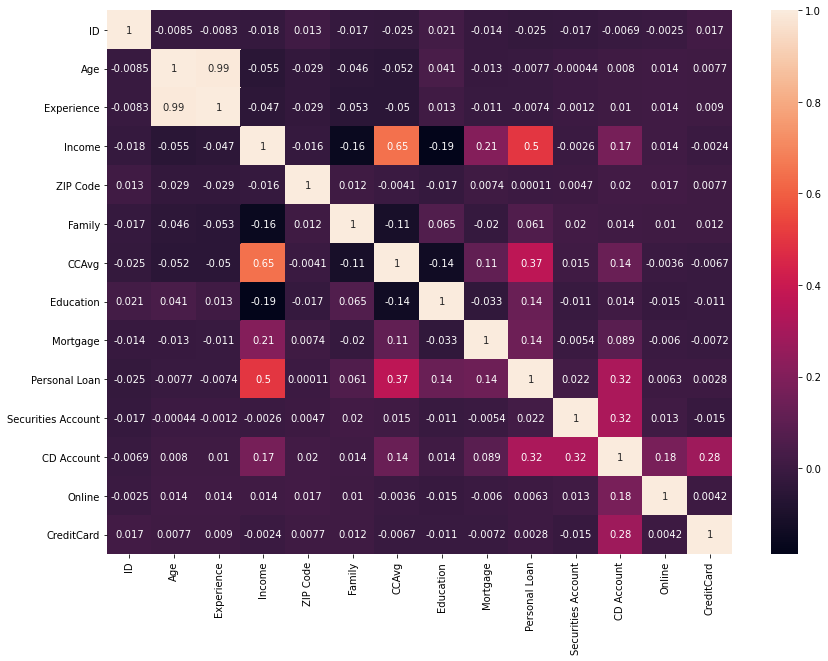

In [9]:
plt.rcParams["figure.figsize"] = (14, 10)
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [10]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
df.drop(["ID"], axis = 1, inplace = True)

In [12]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# EDA

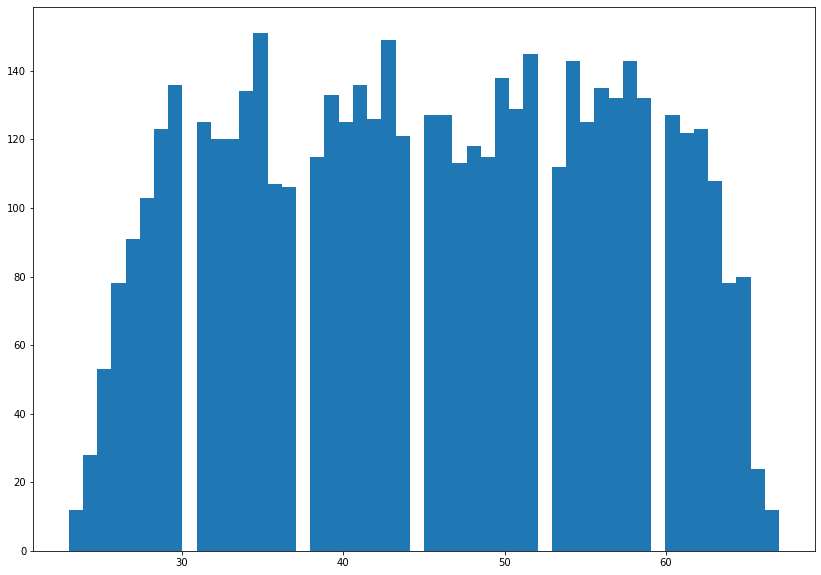

In [13]:
plt.hist(df["Age"], bins = 50)
plt.show()

In [14]:
max(df["Age"]), min(df["Age"])

(67, 23)

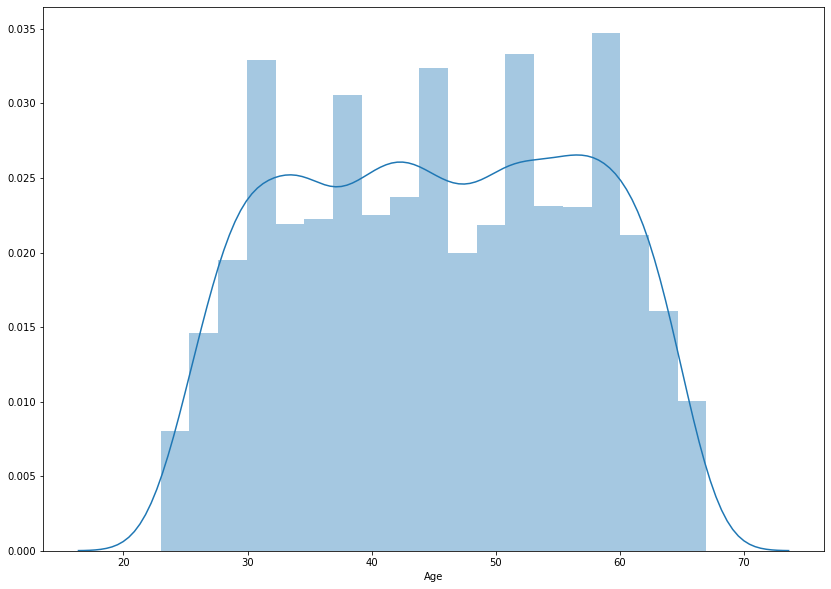

In [15]:
sns.distplot(df["Age"])
plt.show()

In [16]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

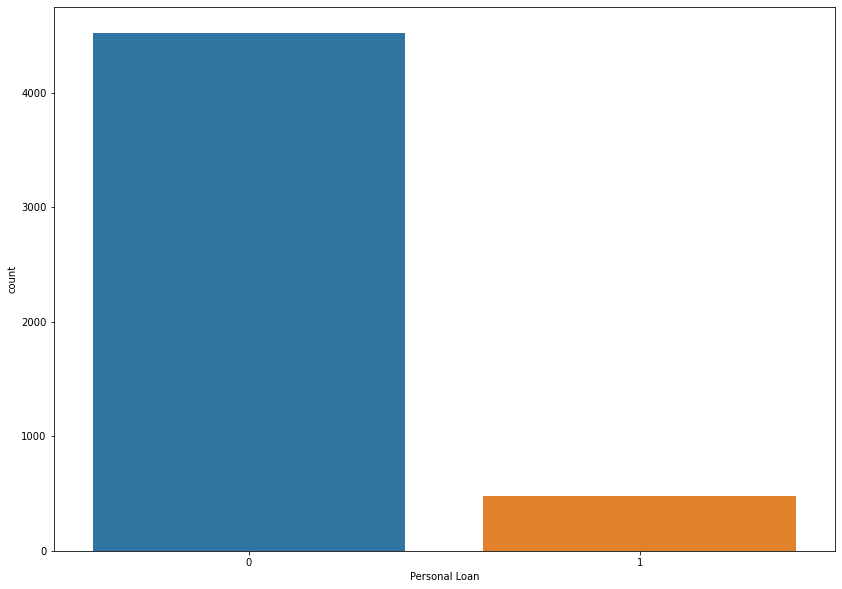

In [17]:
sns.countplot(x = "Personal Loan", data = df);

In [18]:
df["Personal Loan"].value_counts().reset_index()

,index,Personal Loan
0,0,4520
1,1,480


In [19]:
counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()

In [20]:
counts.columns = ["Labels", "Personal Loan"]

In [21]:
counts

,Labels,Personal Loan
0,0,4520
1,1,480


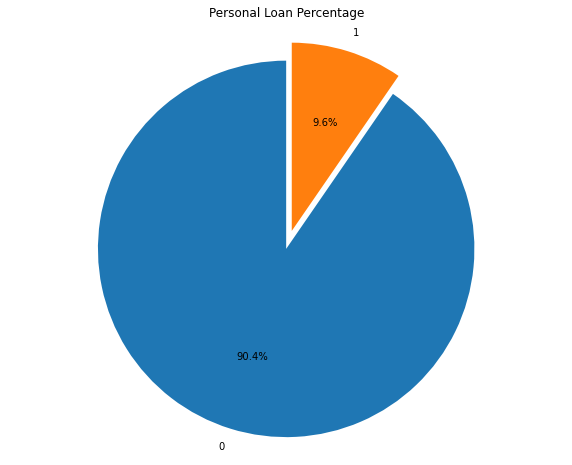

In [22]:
plt.rcParams["figure.figsize"] = (10, 8)
fig, ax = plt.subplots()
explode = (0, 0.1)
plt.pie(counts["Personal Loan"], explode = explode, labels = counts["Labels"], autopct = "%1.1f%%", startangle = 90)
plt.title("Personal Loan Percentage")
ax.axis("equal")
plt.show()

In [23]:
df[df["Personal Loan"] == 0]["Income"]

0        49
1        34
2        11
3       100
4        45
       ... 
4995     40
4996     15
4997     24
4998     49
4999     83
Name: Income, Length: 4520, dtype: int64

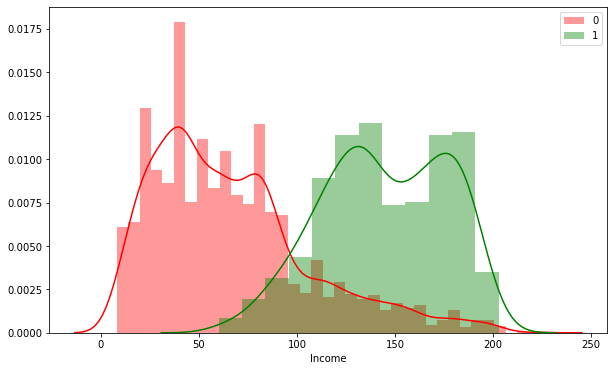

In [24]:
plt.figure(figsize = (10, 6))
sns.distplot(df[df["Personal Loan"] == 0]["Income"], color = "r", label = "0")
sns.distplot(df[df["Personal Loan"] == 1]["Income"], color = "g", label = "1")
plt.legend()
plt.show()

In [25]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


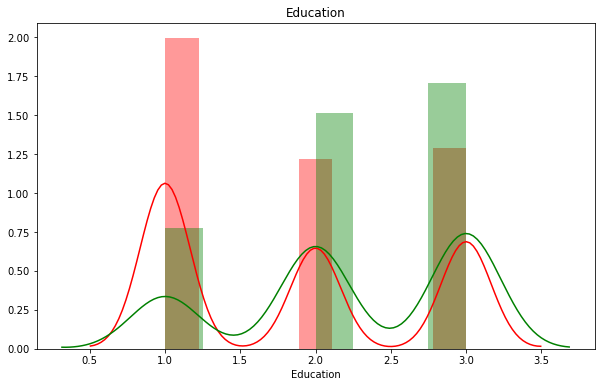

In [26]:
plt.figure(figsize = (10, 6))
sns.distplot(df[df["Personal Loan"] == 0]["Education"], color = "r", label = "0")
sns.distplot(df[df["Personal Loan"] == 1]["Education"], color = "g", label = "1")
plt.title("Education")
plt.show()

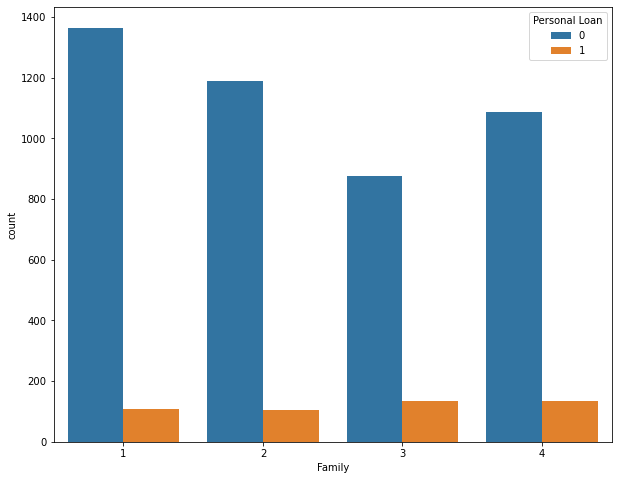

In [27]:
sns.countplot(x = "Family", hue = "Personal Loan", data = df)
plt.show()

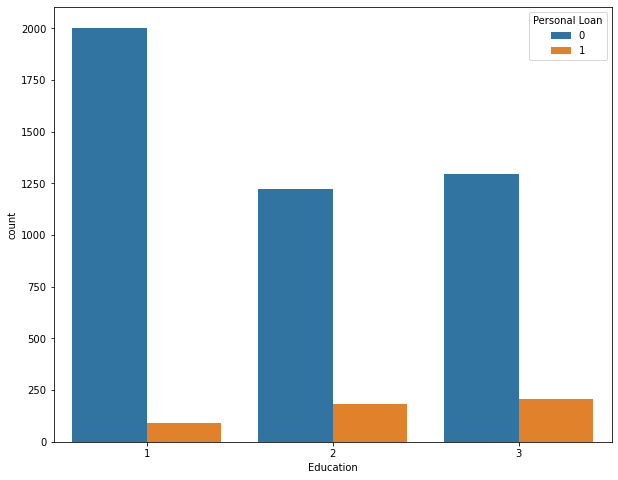

In [28]:
sns.countplot(x = "Education", hue = "Personal Loan", data = df)
plt.show()

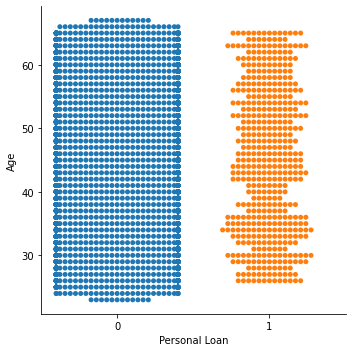

In [29]:
sns.catplot(x = "Personal Loan", y = "Age", data = df, kind = "swarm")
plt.show()

In [30]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


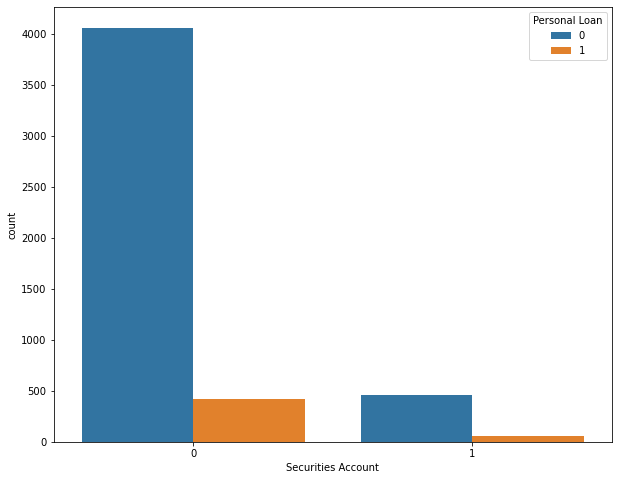

In [31]:
sns.countplot(x = "Securities Account", hue = "Personal Loan", data = df)
plt.show()

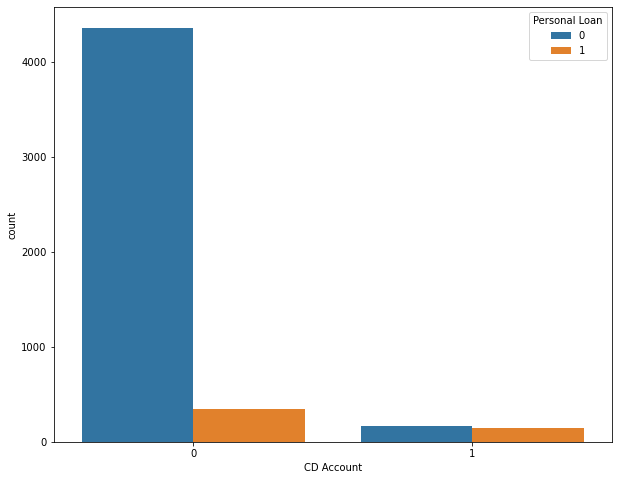

In [32]:
sns.countplot(x = "CD Account", hue = "Personal Loan", data = df)
plt.show()

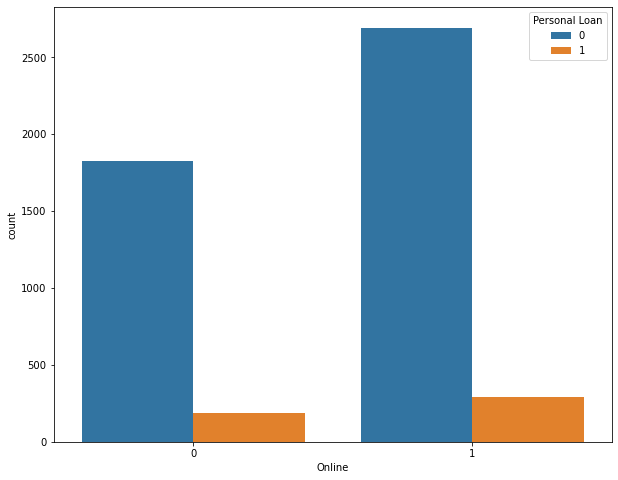

In [33]:
sns.countplot(x = "Online", hue = "Personal Loan", data = df)
plt.show()

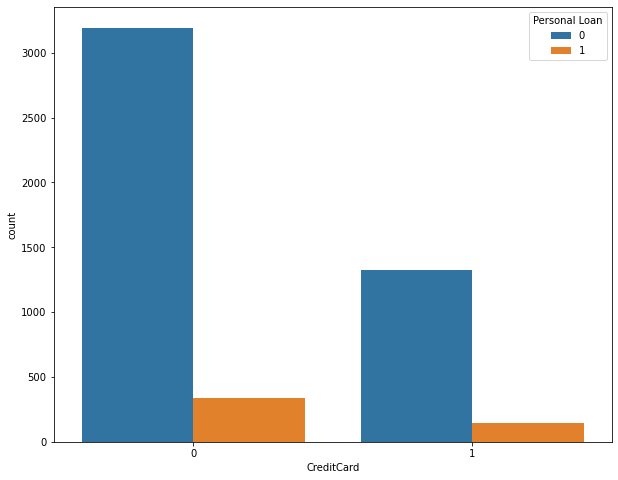

In [34]:
sns.countplot(x = "CreditCard", hue = "Personal Loan", data = df)
plt.show()

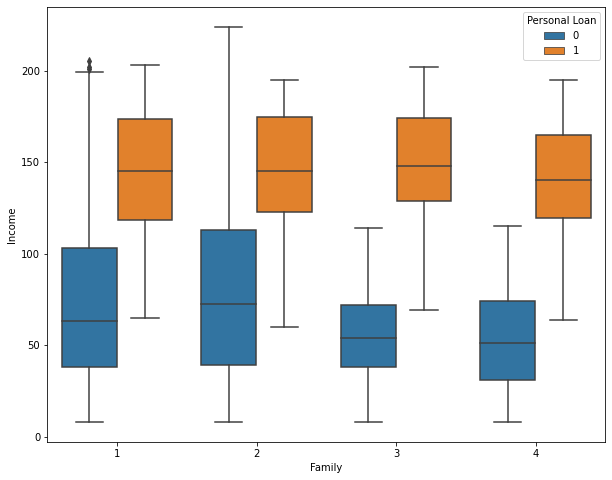

In [35]:
sns.boxplot(x = 'Family', y = "Income", hue = "Personal Loan", data = df)
plt.show()

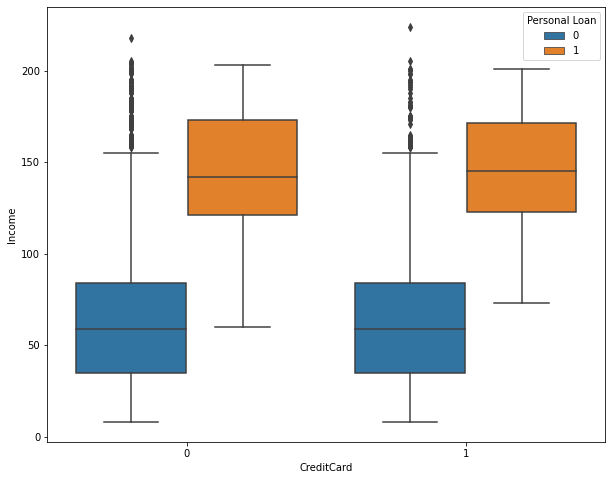

In [36]:
sns.boxplot(x = "CreditCard", y = "Income", hue = "Personal Loan", data = df)
plt.show()

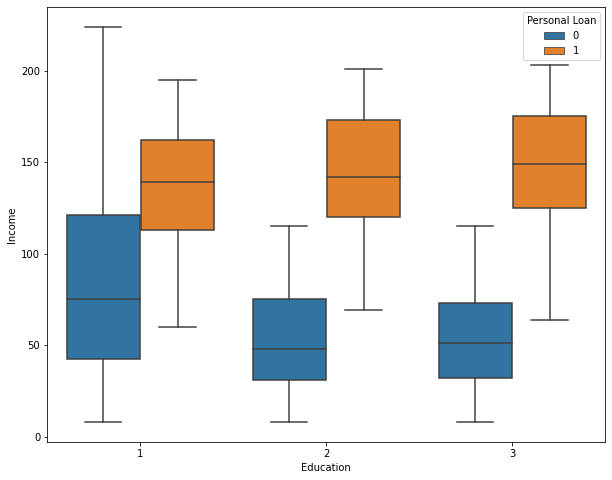

In [37]:
sns.boxplot(x = "Education", y = "Income", hue = "Personal Loan", data = df)
plt.show()

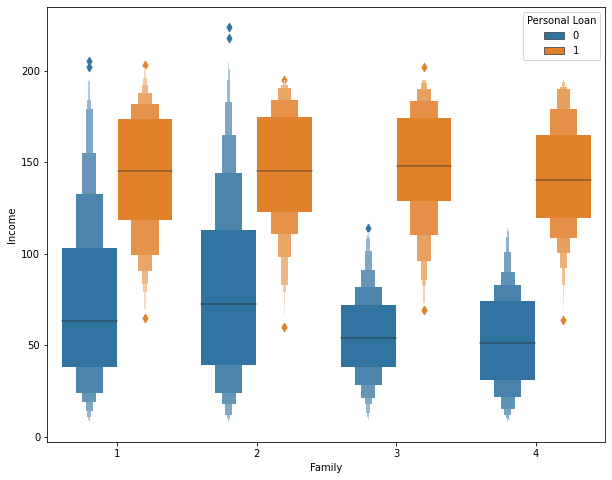

In [38]:
sns.boxenplot(x = 'Family', y = "Income", hue = "Personal Loan", data = df)
plt.show()

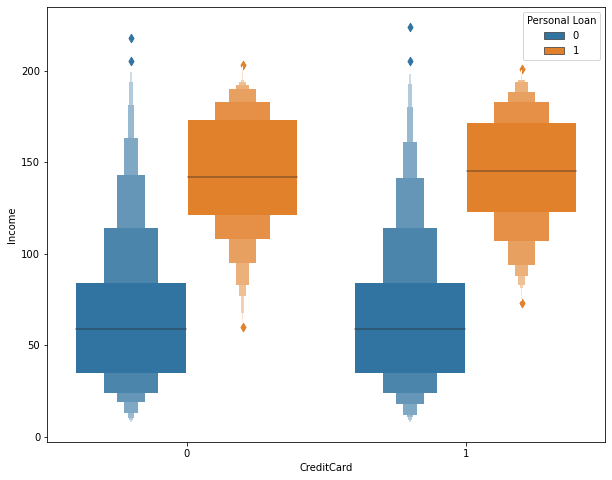

In [39]:
sns.boxenplot(x = "CreditCard", y = "Income", hue = "Personal Loan", data = df)
plt.show()

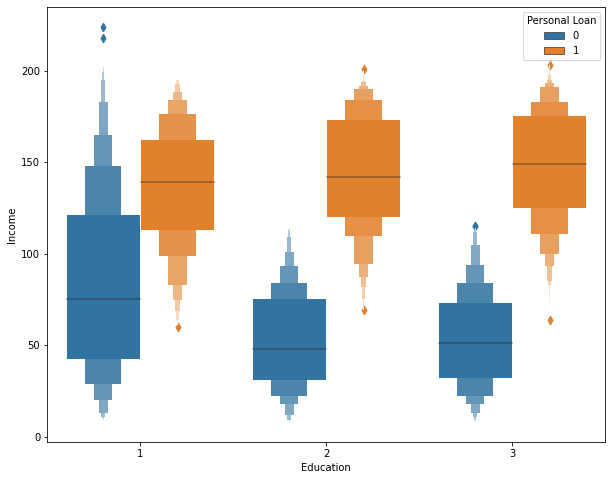

In [40]:
sns.boxenplot(x = "Education", y = "Income", hue = "Personal Loan", data = df)
plt.show()

In [41]:
df.drop(["ZIP Code"], axis = 1, inplace = True)

In [42]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [43]:
scaler = StandardScaler()
df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]] = scaler.fit_transform(df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]])

In [44]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,4,-0.193371,1,-0.555524,0,1,0,0,0
1,-0.029524,-0.096330,-0.864109,3,-0.250595,1,-0.555524,0,1,0,0,0
2,-0.552992,-0.445163,-1.363793,1,-0.536720,1,-0.555524,0,0,0,0,0
3,-0.901970,-0.968413,0.569765,1,0.436103,2,-0.555524,0,0,0,0,0
4,-0.901970,-1.055621,-0.625130,4,-0.536720,2,-0.555524,0,0,0,0,1


In [45]:
X = df.drop(["Personal Loan"], axis = 1)
y = df["Personal Loan"]

In [46]:
X.shape, y.shape

((5000, 11), (5000,))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 11), (1000, 11), (4000,), (1000,))

# Logistic Regression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train, y_train)

LogisticRegression()

In [51]:
lr_pred = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test)

In [52]:
lr_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
lr_predict_proba

array([[9.99816566e-01, 1.83433894e-04],
       [9.99083765e-01, 9.16234554e-04],
       [9.41461194e-01, 5.85388062e-02],
       ...,
       [9.99638395e-01, 3.61605267e-04],
       [9.98072512e-01, 1.92748780e-03],
       [9.67051131e-01, 3.29488690e-02]])

In [54]:
lr_recall_score = cross_val_score(X = X_train, y = y_train, estimator = lr, scoring = "recall")
lr_roc_auc = cross_val_score(X = X_train, y = y_train, estimator = lr, scoring = "roc_auc")

In [55]:
print("Confusion Matrix")
print(confusion_matrix(y_test, lr_pred))
print("Classification Report")
print(classification_report(y_test, lr_pred))
print("Recall Score")
print(recall_score(y_test, lr_pred))
print("ROC AUC")
print(roc_auc_score(y_test, lr_predict_proba[:, 1]))
print("Accuracy")
print(accuracy_score(y_test, lr_pred))
print("Cross Validation Recall")
print(lr_recall_score.mean())
print("Cross Validation ROC AUC")
print(lr_roc_auc.mean())

Confusion Matrix
[[902   8]
 [ 33  57]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       910
           1       0.88      0.63      0.74        90

    accuracy                           0.96      1000
   macro avg       0.92      0.81      0.86      1000
weighted avg       0.96      0.96      0.96      1000

Recall Score
0.6333333333333333
ROC AUC
0.9494871794871794
Accuracy
0.959
Cross Validation Recall
0.617948717948718
Cross Validation ROC AUC
0.9594715533773706


# Support Vector Classifier

In [56]:
svc = SVC(kernel = "rbf", probability = True)

In [57]:
svc.fit(X_train, y_train)

SVC(probability=True)

In [58]:
svc_pred = svc.predict(X_test)
svc_predict_proba = svc.predict_proba(X_test)

In [59]:
svc_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [60]:
svc_predict_proba

array([[9.99988047e-01, 1.19526203e-05],
       [9.99418951e-01, 5.81048666e-04],
       [9.98947732e-01, 1.05226780e-03],
       ...,
       [9.99980756e-01, 1.92444195e-05],
       [9.99627680e-01, 3.72320006e-04],
       [9.99985058e-01, 1.49418928e-05]])

In [61]:
svc_recall_score = cross_val_score(X = X_train, y = y_train, estimator = svc, scoring = "recall")
svc_roc_auc = cross_val_score(X = X_train, y = y_train, estimator = svc, scoring = "roc_auc")

In [62]:
print("Confusion Matrix")
print(confusion_matrix(y_test, svc_pred))
print("Classification Report")
print(classification_report(y_test, svc_pred))
print("Recall Score")
print(recall_score(y_test, svc_pred))
print("ROC AUC")
print(roc_auc_score(y_test, svc_predict_proba[:, 1]))
print("Accuracy")
print(accuracy_score(y_test, svc_pred))
print("Cross Validation Recall")
print(svc_recall_score.mean())
print("Cross Validation ROC AUC")
print(svc_roc_auc.mean())

Confusion Matrix
[[909   1]
 [ 21  69]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       910
           1       0.99      0.77      0.86        90

    accuracy                           0.98      1000
   macro avg       0.98      0.88      0.93      1000
weighted avg       0.98      0.98      0.98      1000

Recall Score
0.7666666666666667
ROC AUC
0.984114774114774
Accuracy
0.978
Cross Validation Recall
0.735897435897436
Cross Validation ROC AUC
0.9884189217984231


# Decision Tree Classifiers

In [63]:
tree = DecisionTreeClassifier()

In [64]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
tree_pred = tree.predict(X_test)
tree_predict_proba = tree.predict_proba(X_test)

In [66]:
tree_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [67]:
tree_predict_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [68]:
tree_recall_score = cross_val_score(X = X_train,  y = y_train, estimator = tree, scoring = "recall")
tree_roc_auc = cross_val_score(X = X_train, y = y_train, estimator = tree, scoring = "roc_auc")

In [69]:
print("Confusion Matrix")
print(confusion_matrix(y_test, tree_pred))
print("Classification Report")
print(classification_report(y_test, tree_pred))
print("Recall Score")
print(recall_score(y_test, tree_pred))
print("ROC AUC")
print(roc_auc_score(y_test, tree_predict_proba[:, 1]))
print("Accuracy")
print(accuracy_score(y_test, tree_pred))
print("Cross Validation Recall")
print(tree_recall_score.mean())
print("Cross Validation ROC AUC")
print(tree_roc_auc.mean())

Confusion Matrix
[[900  10]
 [  8  82]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.89      0.91      0.90        90

    accuracy                           0.98      1000
   macro avg       0.94      0.95      0.95      1000
weighted avg       0.98      0.98      0.98      1000

Recall Score
0.9111111111111111
ROC AUC
0.95006105006105
Accuracy
0.982
Cross Validation Recall
0.9076923076923077
Cross Validation ROC AUC
0.9442858157539596


# Random Forest Classifiers

In [70]:
rfc = RandomForestClassifier(n_jobs = -1)

In [71]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [72]:
rfc_pred = rfc.predict(X_test)
rfc_predict_proba = rfc.predict_proba(X_test)

In [73]:
rfc_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [74]:
rfc_predict_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [75]:
rfc_recall_score = cross_val_score(X = X_train, y = y_train, estimator = rfc, scoring = "recall")
rfc_roc_auc = cross_val_score(X = X_train, y = y_train, estimator = rfc, scoring = "roc_auc")

In [76]:
print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_pred))
print("Classification Report")
print(classification_report(y_test, rfc_pred))
print("Recall Score")
print(recall_score(y_test, rfc_pred))
print("ROC AUC")
print(roc_auc_score(y_test, rfc_predict_proba[:, 1]))
print("Accuracy")
print(accuracy_score(y_test, rfc_pred))
print("Cross Validation Recall")
print(rfc_recall_score.mean())
print("Cross Validation ROC AUC")
print(rfc_roc_auc.mean())

Confusion Matrix
[[905   5]
 [  9  81]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.94      0.90      0.92        90

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Recall Score
0.9
ROC AUC
0.995927960927961
Accuracy
0.986
Cross Validation Recall
0.8871794871794872
Cross Validation ROC AUC
0.9970008523332623


# Gradient Boosting Classifier

In [77]:
gb = GradientBoostingClassifier()

In [78]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [79]:
gb_pred = gb.predict(X_test)
gb_predict_proba = gb.predict_proba(X_test)

In [80]:
gb_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [81]:
gb_predict_proba

array([[9.99486833e-01, 5.13166717e-04],
       [9.98523803e-01, 1.47619735e-03],
       [9.99463575e-01, 5.36425322e-04],
       ...,
       [9.99486833e-01, 5.13166717e-04],
       [9.99419942e-01, 5.80058217e-04],
       [9.99400514e-01, 5.99486066e-04]])

In [82]:
gb_recall_score = cross_val_score(X = X_train, y = y_train, estimator = gb, scoring = "recall")
gb_roc_auc = cross_val_score(X = X_train, y = y_train, estimator = gb, scoring = "roc_auc")

In [89]:
print("Confusion Matrix")
print(confusion_matrix(y_test, gb_pred))
print("Classification Report")
print(classification_report(y_test, gb_pred))
print("Recall Score")
print(recall_score(y_test, gb_pred))
print("ROC AUC")
print(roc_auc_score(y_test, gb_predict_proba[:, 1]))
print("Accuracy")
print(accuracy_score(y_test, gb_pred))
print("Cross Validation Recall")
print(gb_recall_score.mean())
print("Cross Validation ROC AUC")
print(gb_roc_auc.mean())

Confusion Matrix
[[906   4]
 [  8  82]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.95      0.91      0.93        90

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Recall Score
0.9111111111111111
ROC AUC
0.9983760683760685
Accuracy
0.988
Cross Validation Recall
0.9051282051282051
Cross Validation ROC AUC
0.9975957099225798
